## 💰 Développez un programme d'IA pour la prédiction des faillites d'entreprises

**Objectif :**
Notre objectif dans ce projet est d'utiliser les modèles ensemblistes pour nous aider à détecter les entreprises proches de la faillite.

**Contexte :** Vous êtes développeur dans une entreprise qui travaille dans le domaine de la FinTech. Votre client est une société d'investissement qui souhaite détecter les faillites d'entreprises, ce qui leur permet de mieux comprendre et gérer les risques.

Votre objectif est de créer un modèle de machine learning pour détecter la probabilité de faire faillite en utilisant les decision trees et les méthodes ensemblistes (bagging, boosting and stacking).

Pour cela, vous disposez d'un dataset avec 95 features (X1-X95) et un target. Les features représentent des indicateurs définis par les réglementations commerciaux de la Bourse. Votre target est appelé "Bankrupt ?", qui a la valeur 0 si l'entreprise n'a pas fait faillite, et la valeur 1 si l'entreprise a fait faillite.

### 💸 Exploration du Dataset

💷 Importations Librairies

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

💷 Importation Dataset

In [62]:
df = pd.read_csv('C:/Users/zaome/Documents/Arthuro/Projet_faillites_entreprises/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

### 💸 EDA

💷 Data shape

In [63]:
df.shape

(6819, 96)

💷 Data information

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

💷 Data descriptive

In [65]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

💷 Affichage des colonnes

In [66]:
pd.options.display.max_columns = None
display(df.head())

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

💷 Types de valeurs

In [67]:
df_dtype = df.dtypes
df_dtype.value_counts()

float64    93
int64       3
dtype: int64

💷 Visu de la répartition de la target

<AxesSubplot:ylabel='None'>

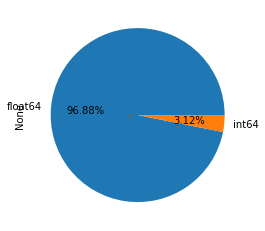

In [68]:
df.dtypes.value_counts().plot.pie(autopct = lambda x: str(round(x, 2)) + '%')

💷 Valeurs manquantes

In [69]:
df.isnull().sum().sort_values()

Bankrupt?                                 0
 Total income/Total expense               0
 Retained Earnings to Total Assets        0
 Long-term Liability to Current Assets    0
 Current Liabilities/Equity               0
                                         ..
 Regular Net Profit Growth Rate           0
 After-tax Net Profit Growth Rate         0
 Operating Profit Growth Rate             0
 Net Income Flag                          0
 Equity to Liability                      0
Length: 96, dtype: int64

💷 Valeur NaN

In [70]:
df.isna().sum().max()

0

💷 Missing Values

In [71]:
df_nan = pd.DataFrame({'Nan':df.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/df.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

,Nan,%nan
Bankrupt?,0,0.0
ROA(C) before interest and depreciation before interest,0,0.0
Total expense/Assets,0,0.0
Total income/Total expense,0,0.0
Retained Earnings to Total Assets,0,0.0
...,...,...
Total Asset Growth Rate,0,0.0
Continuous Net Profit Growth Rate,0,0.0
Regular Net Profit Growth Rate,0,0.0
After-tax Net Profit Growth Rate,0,0.0


💷 Duplicates

In [72]:
df.duplicated().sum()

0

💷 Esapace devant les features

In [73]:
df.columns= [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]

💷 Supprimer les colonnes inutiles

In [74]:
df = df.drop(['Net Income Flag','Liability-Assets Flag'],axis=1)

💷 Outliers_1

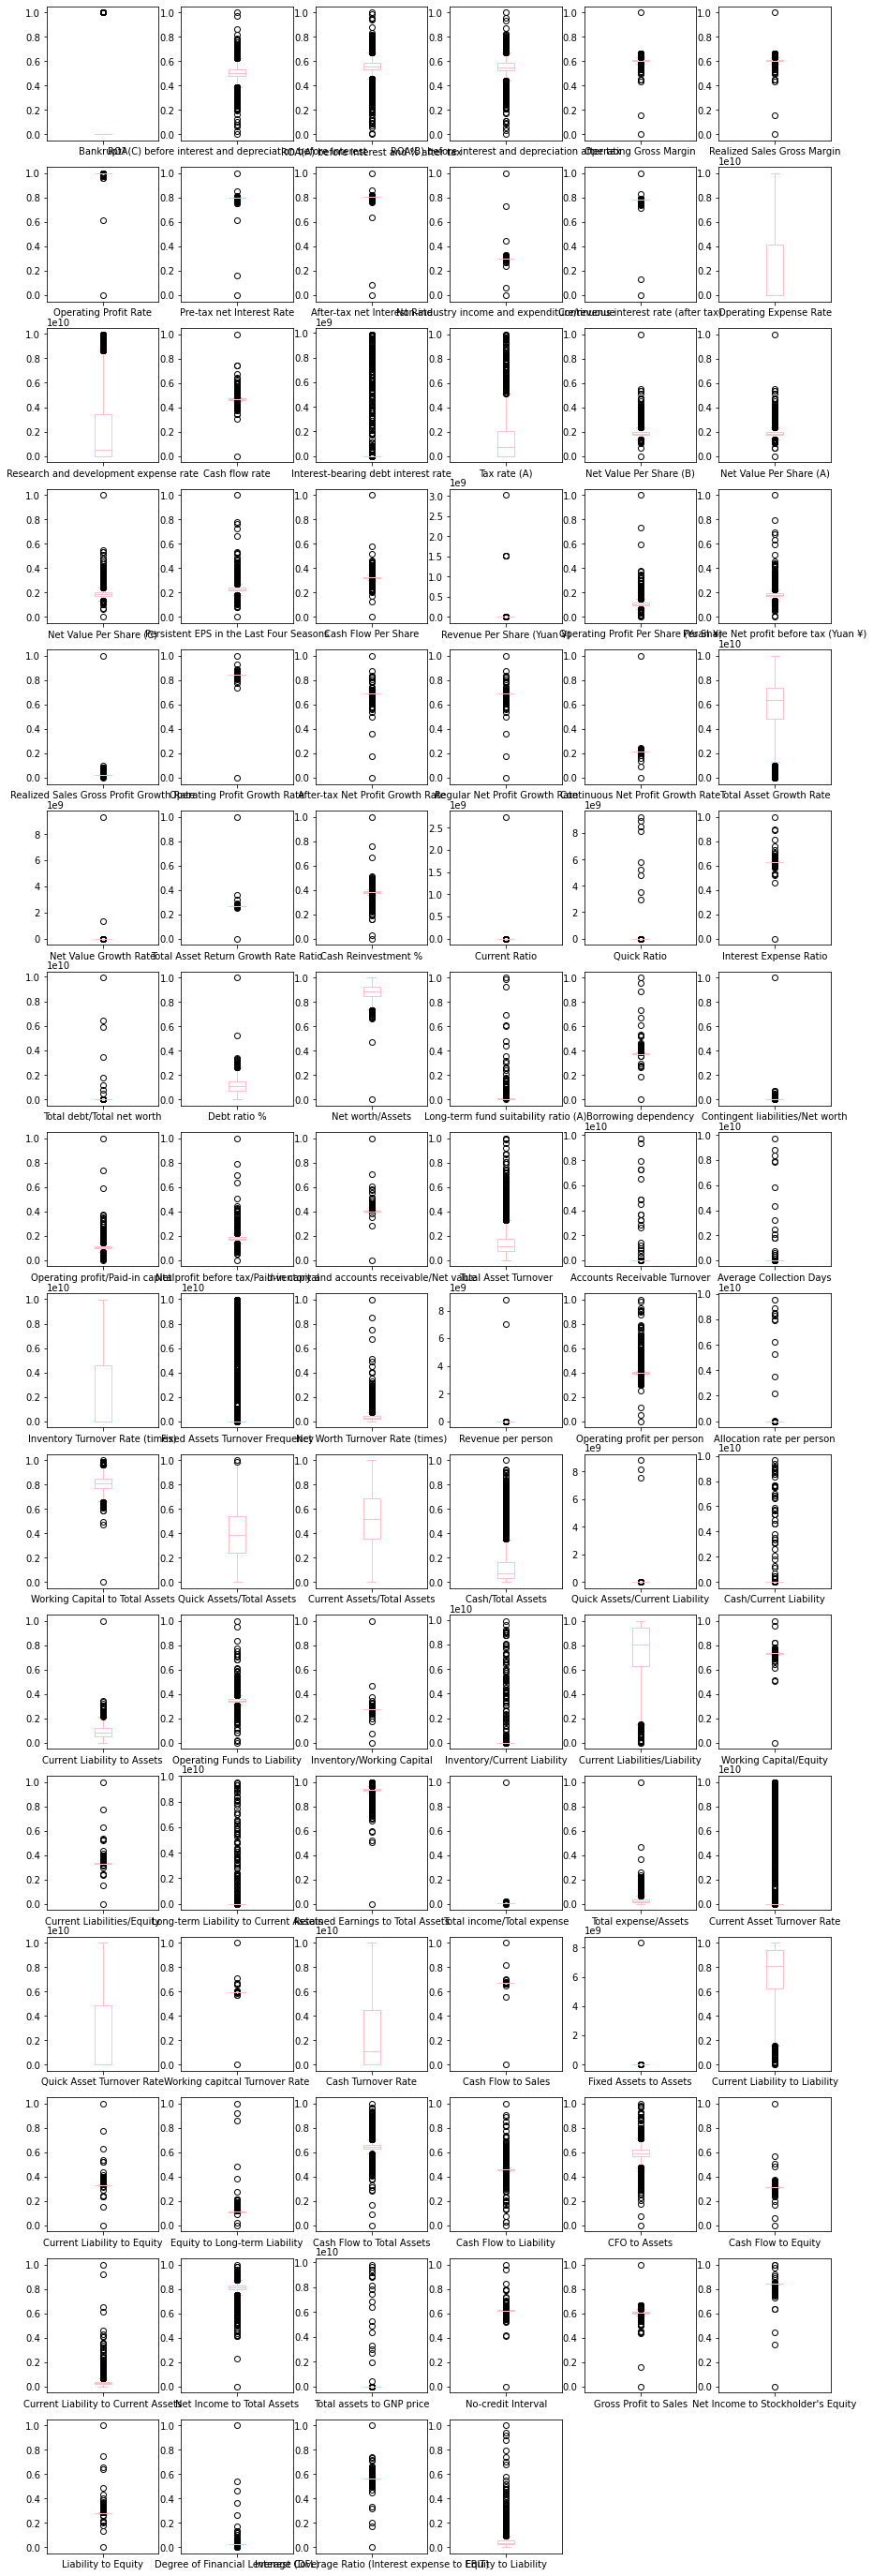

In [75]:
df.plot(kind='box', subplots=True, layout=(16,6), figsize = (15, 50), color='pink')
plt.show()

💷 Outliers_2

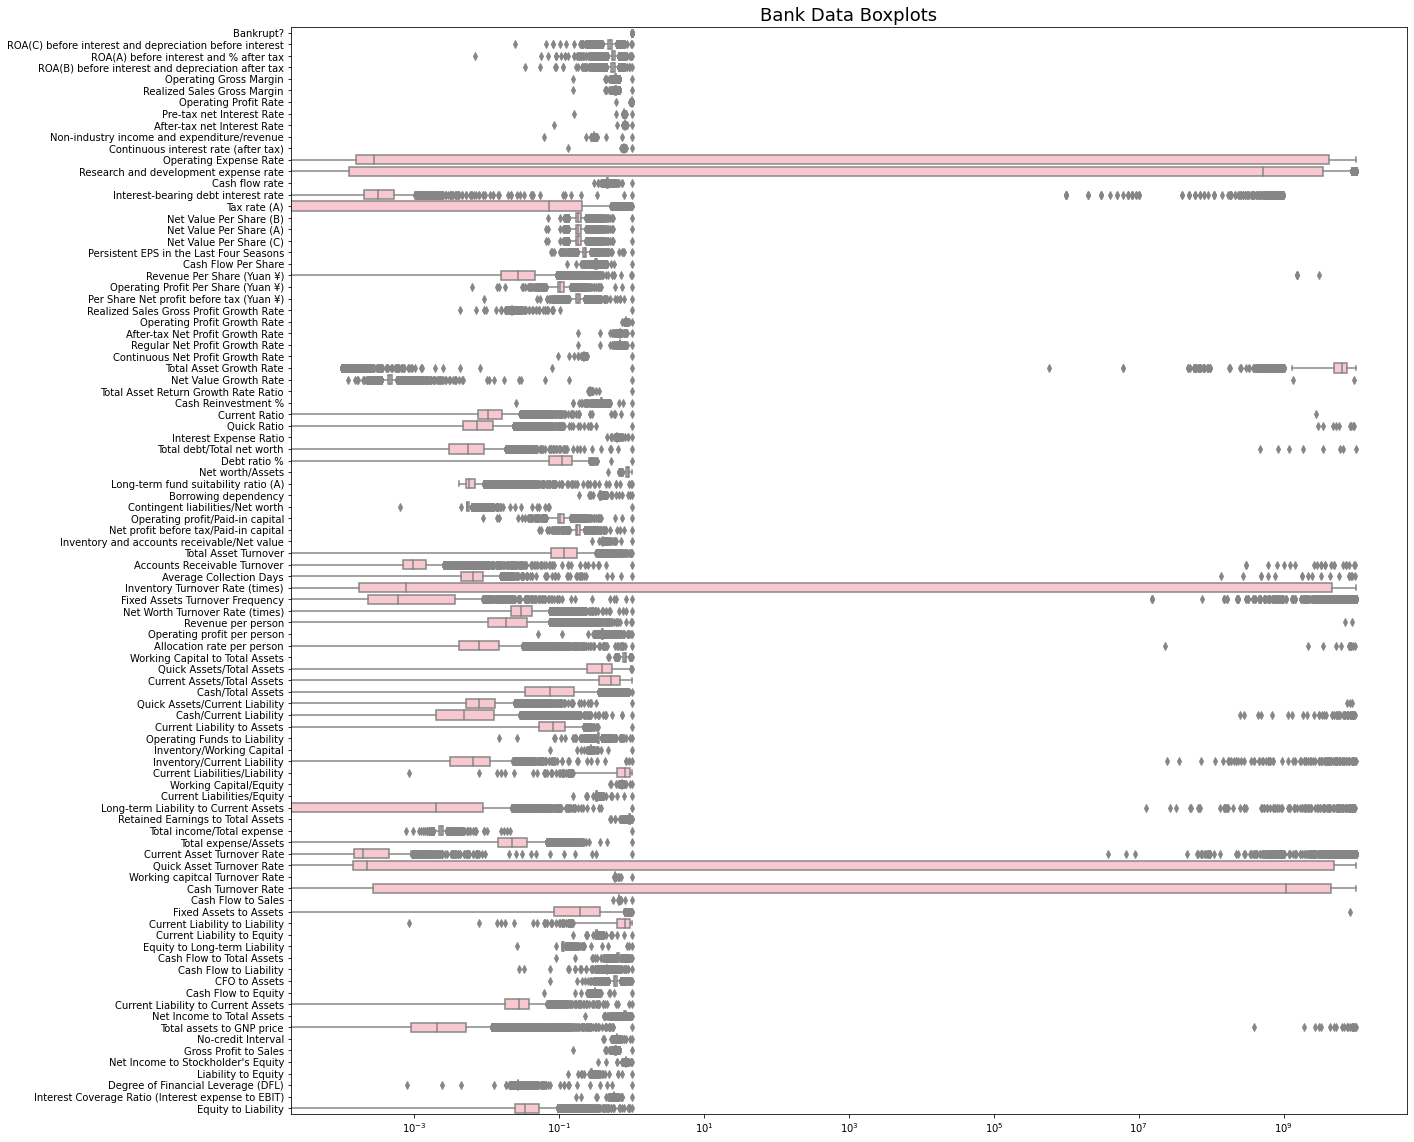

In [76]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = df, orient="h", color='pink')
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")

plt.show()

💷 Histogramme

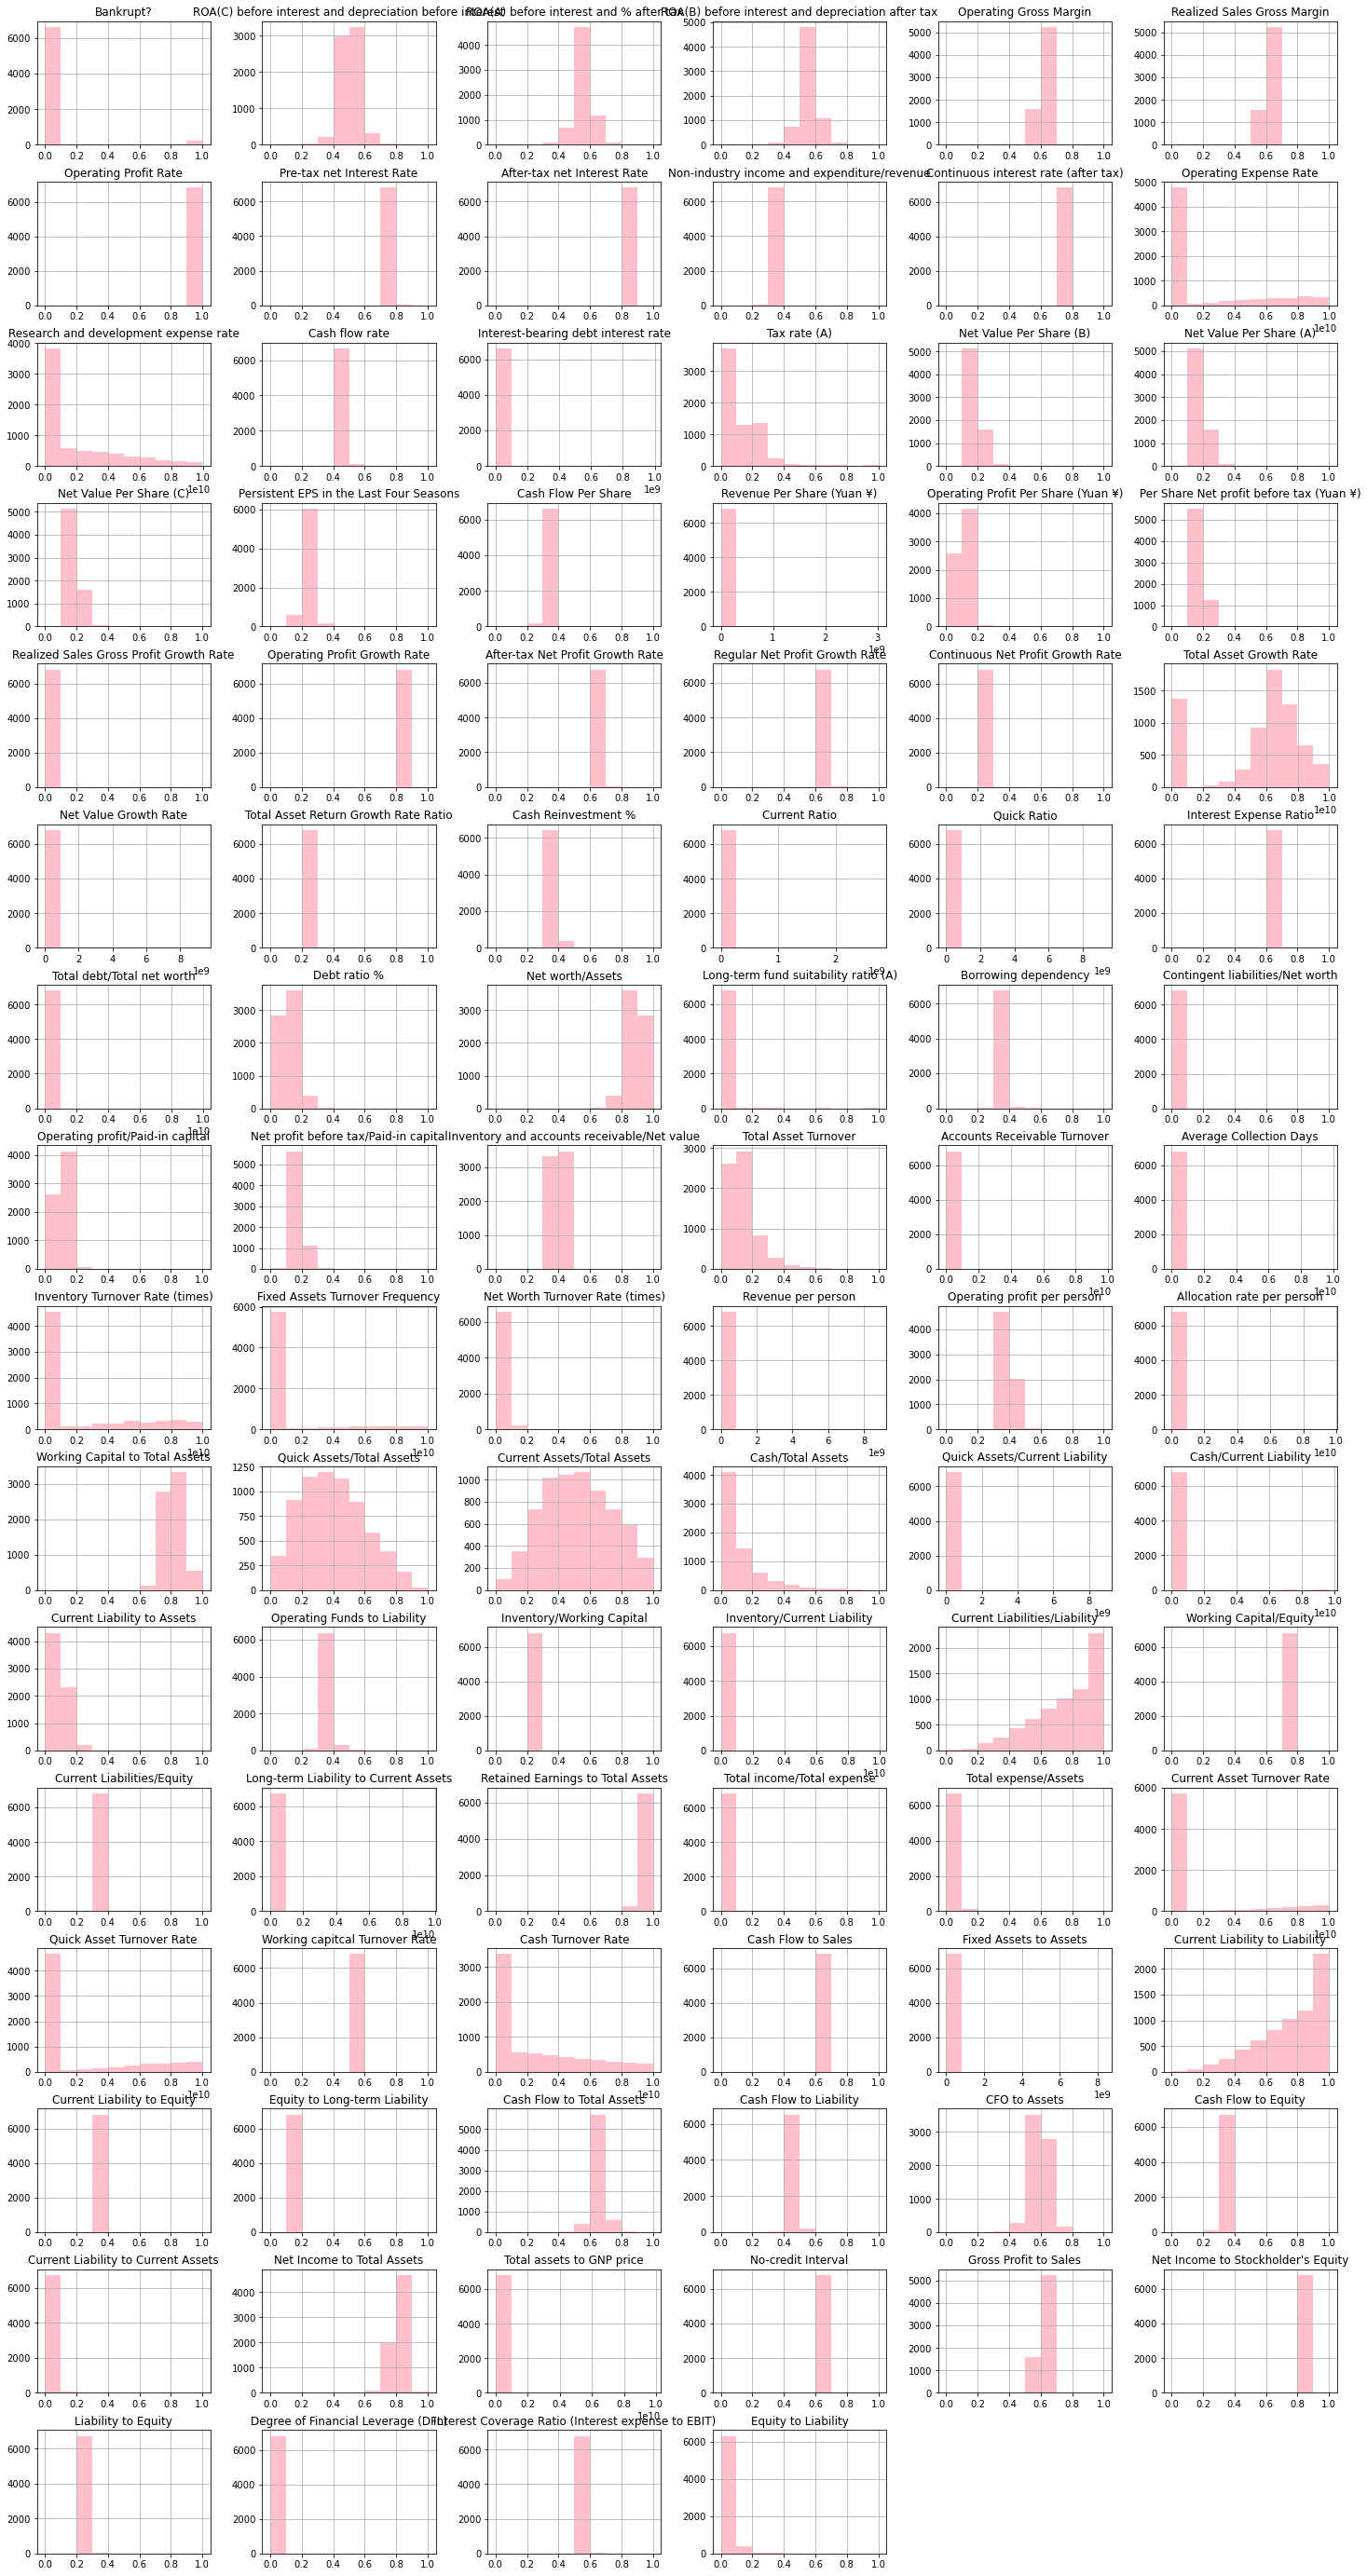

In [77]:
df.hist(layout=(16,6), figsize = (25, 50), color='pink')
plt.show()

💷 Matrice de correlation_1

<AxesSubplot:>

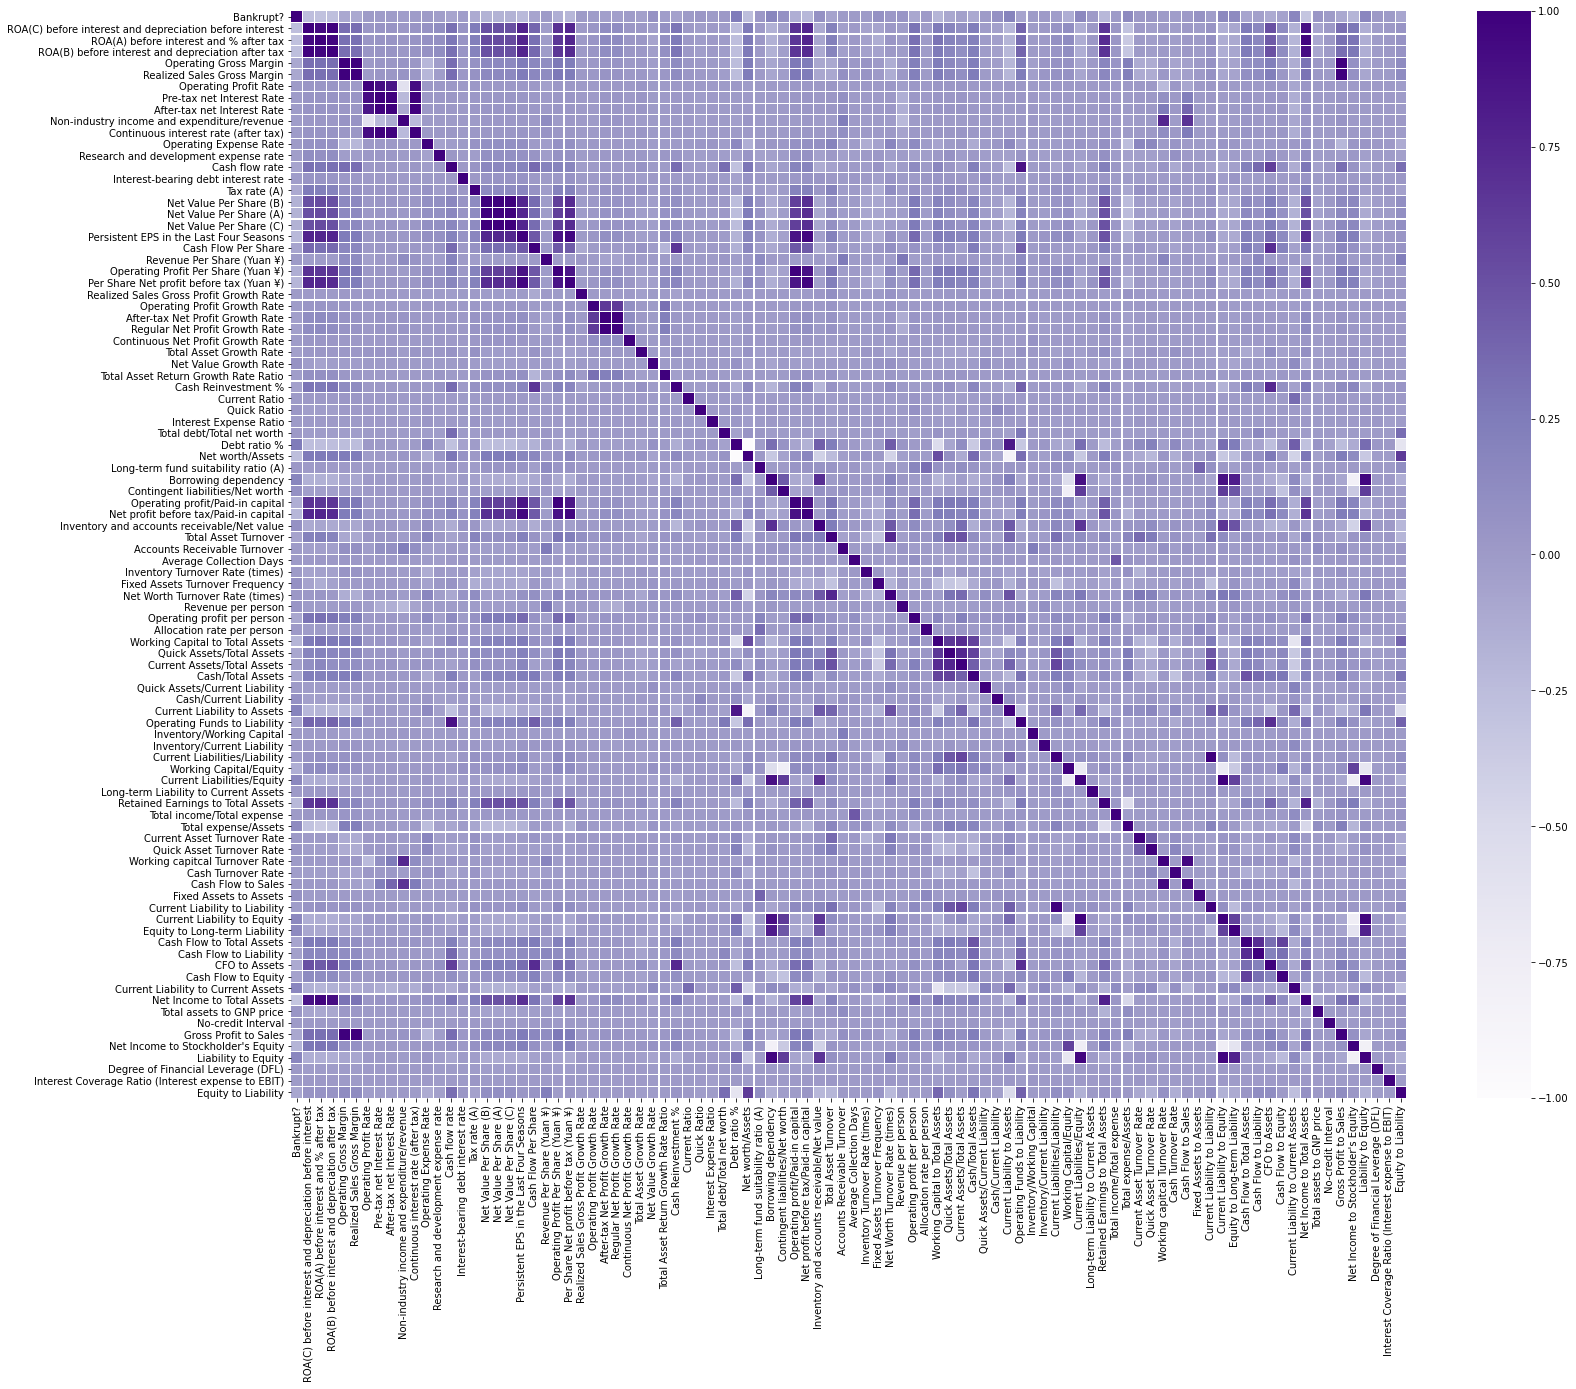

In [78]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (25,20))
sns.heatmap(corr, ax=ax, cmap='Purples', linewidth=0.1)

💷 Matrice de correlation_2

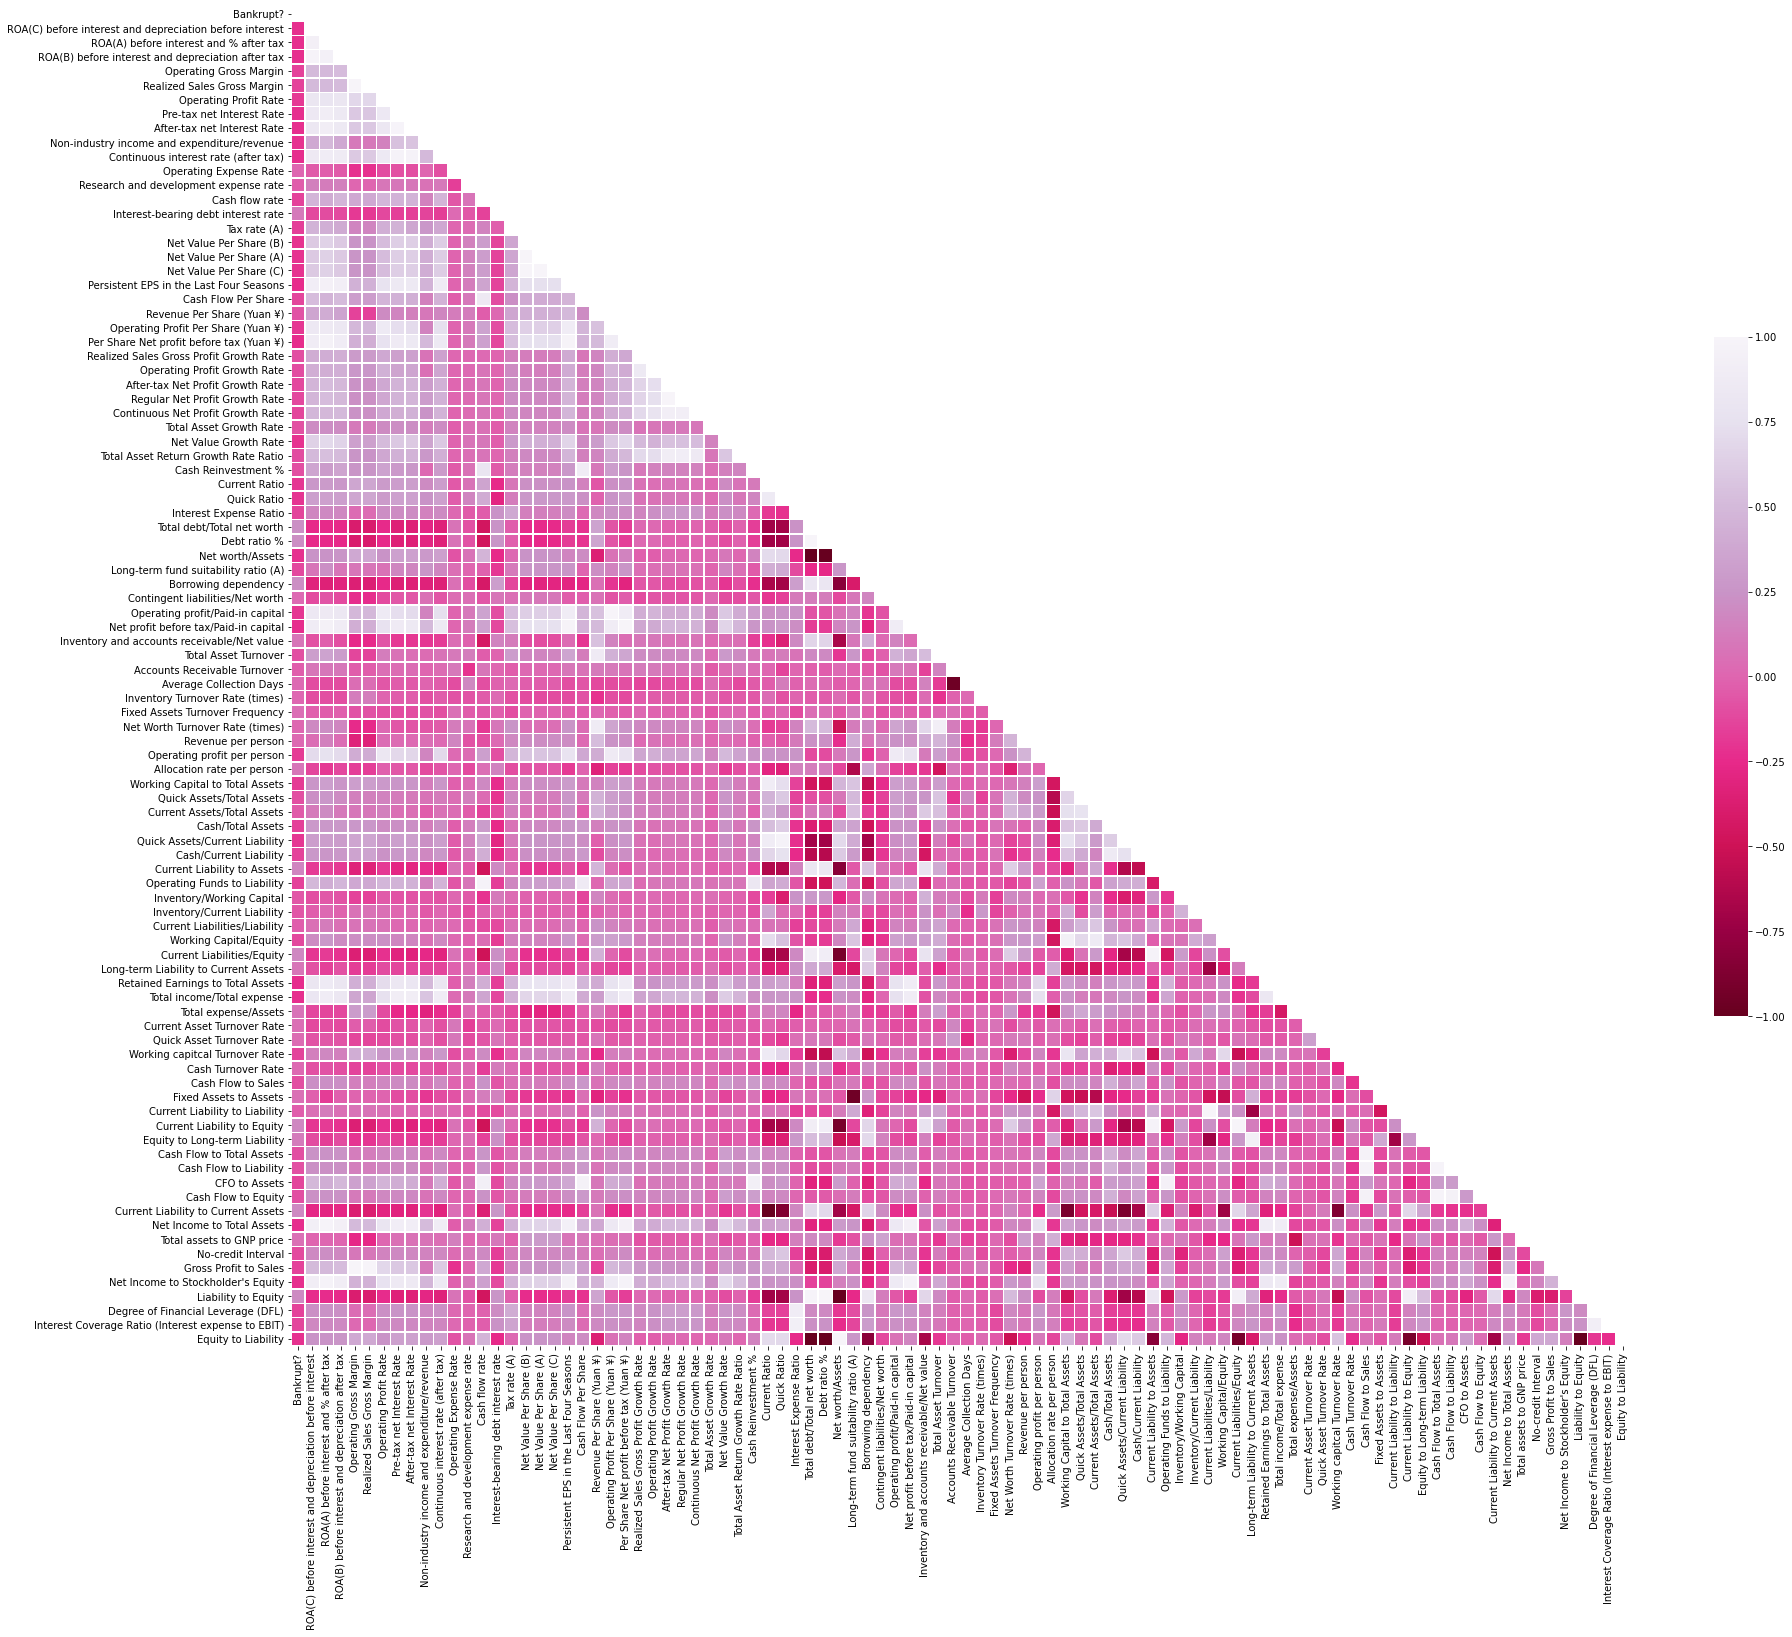

In [79]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap='PuRd_r', vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## 💸 Target

💷 Target feature

In [80]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

💷 Analyse de la target

0    96.77372
1     3.22628
Name: Bankrupt?, dtype: float64


C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


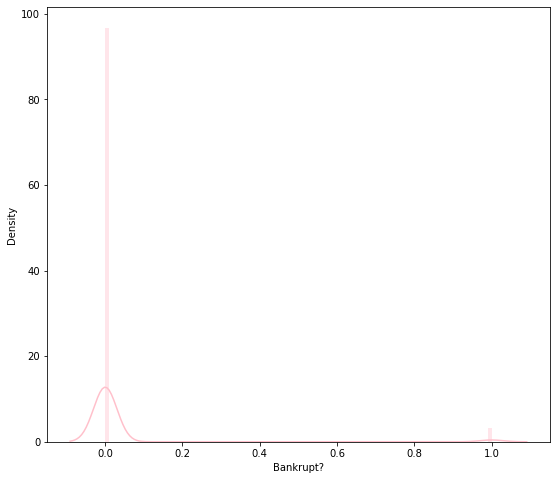

In [81]:
print(df['Bankrupt?'].value_counts()/6819*100)

plt.figure(figsize=(9, 8))

sns.distplot(df['Bankrupt?'], color='pink', bins=100, hist_kws={'alpha': 0.4});

💷 Corrélation avec la target

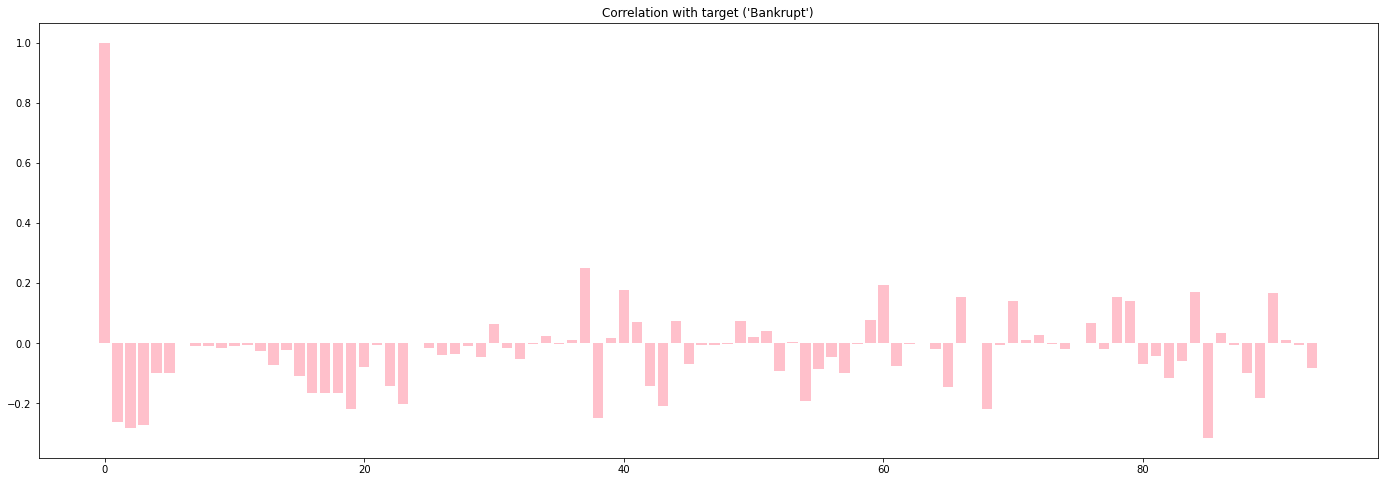

In [82]:
m, n = df.shape
mean = df.mean().values             # Mean value for each column
std  = df.std().values * np.sqrt(m) # Std values for each column (* num samples)
corr = ((df.values - mean) * (df.values[:,0] - mean[0]).reshape(m, 1)).sum(axis=0) / (std * std[0])

fig, corr_ax = plt.subplots(figsize=(24, 8))
corr_ax.bar(x=np.arange(len(df.columns)), height=corr, color='pink')
corr_ax.set_title("Correlation with target ('Bankrupt')")

plt.show()

💷 Features corrélées

In [83]:
df_corr = df.corr()['Bankrupt?'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_corr[abs(df_corr) > 0.15].sort_values(ascending=False)
print("Il y a {}  variables corrélées légerement:\n{}".format(len(golden_features_list), golden_features_list))

Il y a 22  variables corrélées légerement:
Bankrupt?                                                  1.000000
Debt ratio %                                               0.250161
Current Liability to Assets                                0.194494
Borrowing dependency                                       0.176543
Current Liability to Current Assets                        0.171306
Liability to Equity                                        0.166812
Current Liabilities/Equity                                 0.153828
Current Liability to Equity                                0.153828
Net Value Per Share (C)                                   -0.164784
Net Value Per Share (B)                                   -0.165399
Net Value Per Share (A)                                   -0.165465
Net Income to Stockholder's Equity                        -0.180987
Working Capital to Total Assets                           -0.193083
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net p

💷 Matrice de corrélation avec les features les mieux corrélées

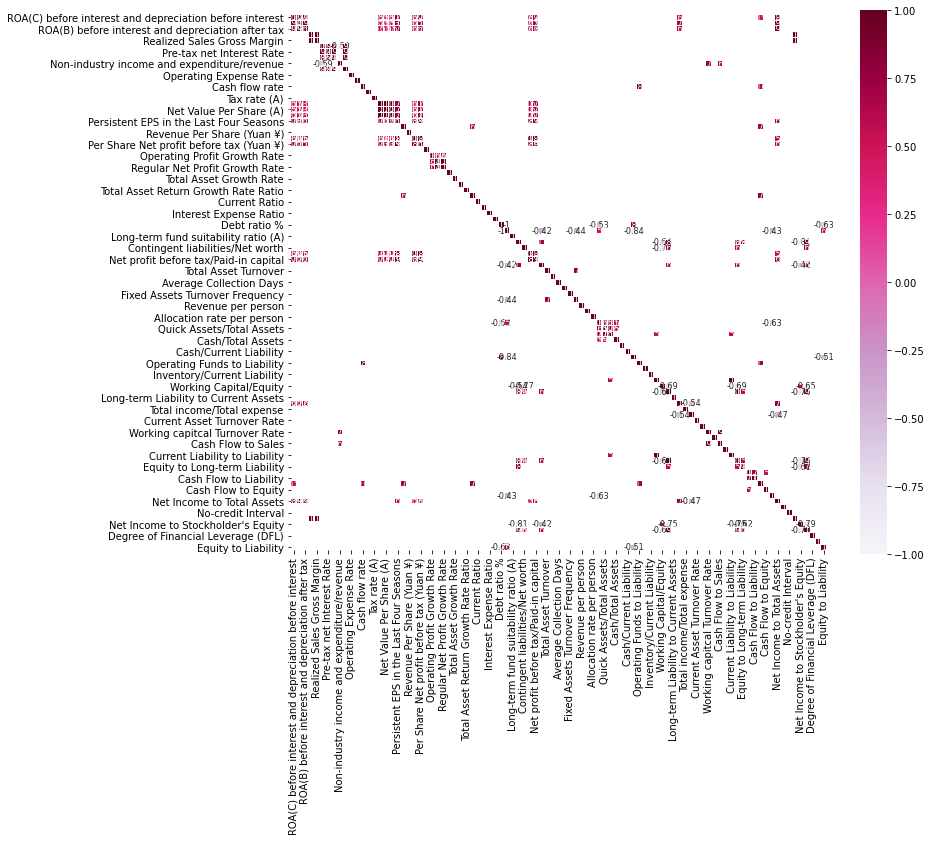

In [84]:
corr = df.drop('Bankrupt?', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='PuRd', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

💷 Target balancing

Text(0.5, 1.0, 'Target feature - Bankrupt?')

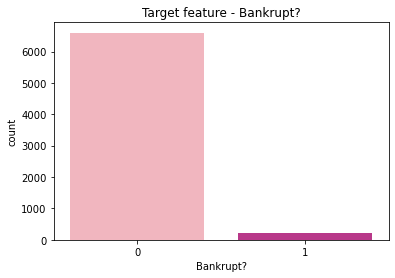

In [85]:
sns.countplot(x = df['Bankrupt?'], palette='RdPu')
plt.title('Target feature - Bankrupt?')

💡 En regardant le graphique ci-dessus, nous pouvons clairement voir comment nos étiquettes sont fortement déséquilibrées.

💷 Oversampling Target 

In [86]:
!pip install imblearn

SMOTE est un type d'augmentation des données qui synthétise de nouveaux échantillons à partir des échantillons existants.

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
X = df.drop(labels=['Bankrupt?'], axis=1)
y = df['Bankrupt?']

💷 Oversampling the Target variable using SMOTE

In [89]:
oversample = SMOTE()

Text(0.5, 1.0, 'Target feature - Bankrupt?')

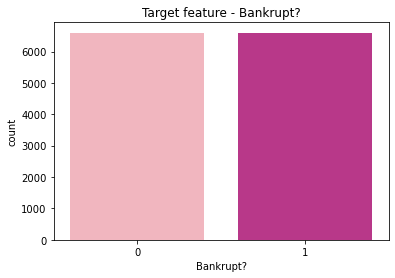

In [90]:
X,y = oversample.fit_resample(X,y)
sns.countplot(x=y, palette='RdPu')
plt.title('Target feature - Bankrupt?')

## 💸 Création du nouveau csv pour le Notebook_model

In [91]:
df.to_csv("data_new.csv")